<a href="https://colab.research.google.com/github/irshandyaditya/PCVK_Ganjil_2024/blob/Week-6/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul 6**

**Irshandy Aditya Wicaksana   TI - 3A / 16**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

In [4]:
from google.colab import drive

# accessing google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

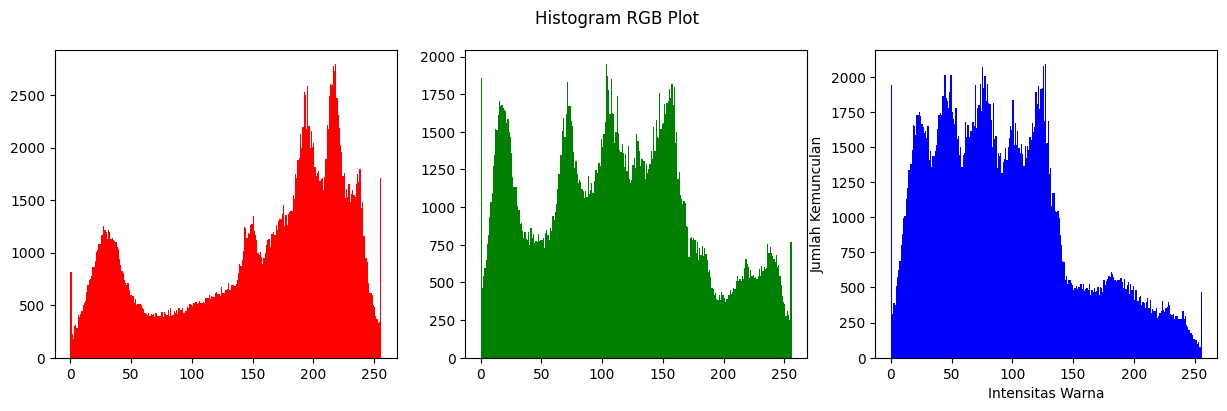

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

# Memisahkan channel warna
b,g,r = cv.split(img)

# Membuat histogram untuk setiap channel
plt.figure(figsize=(15,4))
plt.subplot(1,3,1), plt.hist(r.ravel(),256,[0,256], color='red')
plt.subplot(1,3,2), plt.hist(g.ravel(),256,[0,256], color='green')
plt.subplot(1,3,3), plt.hist(b.ravel(),256,[0,256], color='blue')

# Memberikan judul dan label pada sumbu
plt.suptitle("Histogram RGB Plot")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

# Menampilkan plot
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


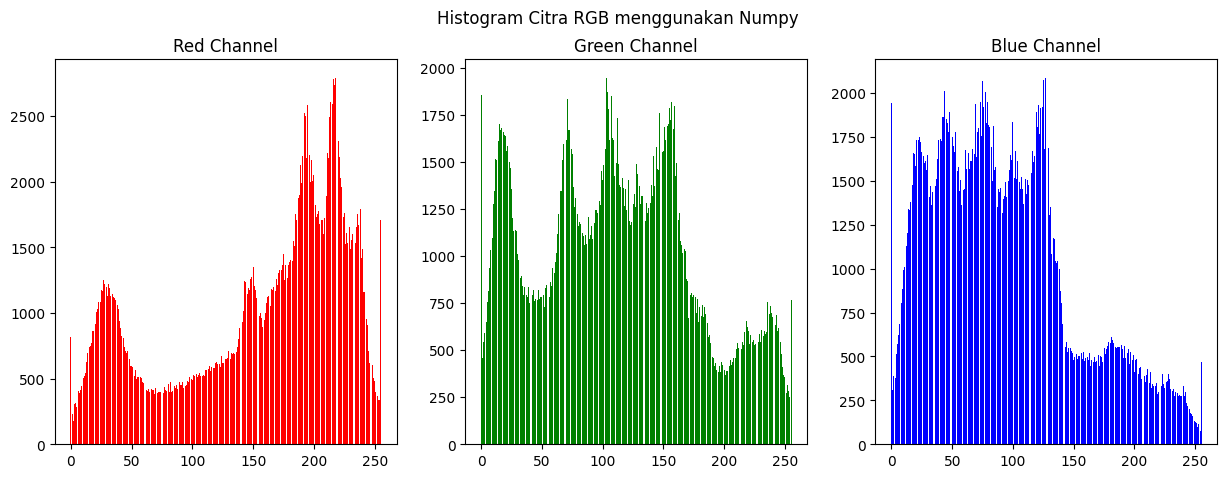

In [13]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

# Memisahkan channel warna
b,g,r = cv.split(img)

# Buat histogram menggunakan numpy
hist_r, bins_r = np.histogram(r.ravel(), 256, [0,256])
hist_g, bins_g = np.histogram(g.ravel(), 256, [0,256])
hist_b, bins_b = np.histogram(b.ravel(), 256, [0,256])

# Plot histogram RGB
color_range = np.arange(256)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(color_range, hist_r, color='red')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.bar(color_range, hist_g, color='green')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.bar(color_range, hist_b, color='blue')
plt.title('Blue Channel')

plt.suptitle('Histogram Citra RGB menggunakan Numpy')
plt.show()


5.  Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

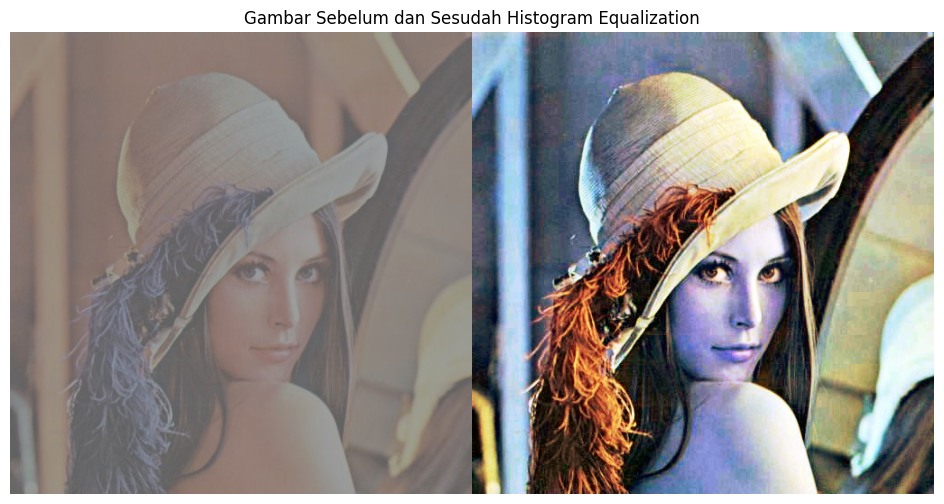

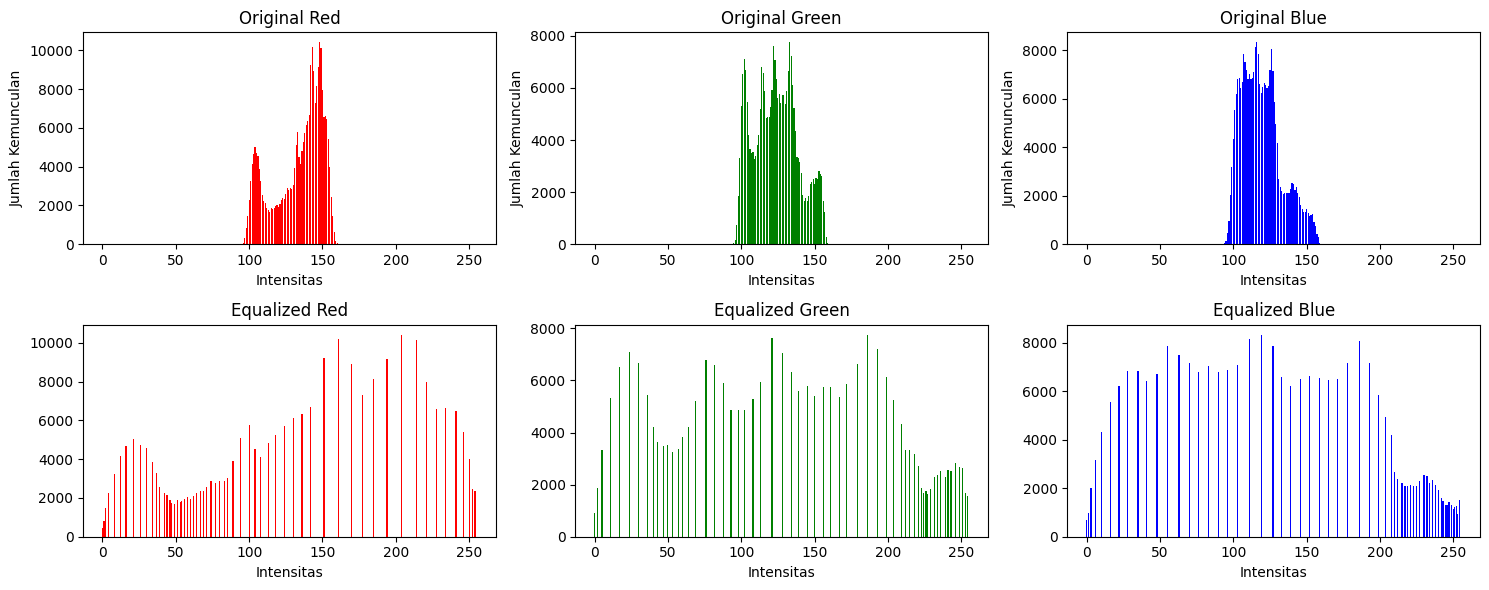

In [15]:
# Input Image: Baca gambar input dan konversi ke RGB
img = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Langkah 1: Input Image

# Fungsi untuk menghitung frekuensi pixel dan menghasilkan channel yang sudah di-equalize
def getEqualizedImage(image_channel):
    # Langkah 2: Menghitung jumlah kemunculan setiap pixel warna (Frekuensi)
    frequency = np.bincount(image_channel.flatten(), minlength=256)

    # Langkah 3: Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
    normalized_cumsum = np.cumsum(frequency) / image_channel.size

    # Langkah 4: Normalisasi dengan kumulatif frekuensi seluruh pixel (Skala 0-255)
    equalized_channel = np.uint8(normalized_cumsum[image_channel] * 255)

    return equalized_channel, frequency

# Langkah 5: Pisahkan channel, hitung equalized channel, dan buat gambar baru
R_eq, freq_R = getEqualizedImage(image_rgb[:,:,0])  # Equalization untuk channel Merah
G_eq, freq_G = getEqualizedImage(image_rgb[:,:,1])  # Equalization untuk channel Hijau
B_eq, freq_B = getEqualizedImage(image_rgb[:,:,2])  # Equalization untuk channel Biru

# Langkah 6: Gabungkan channel equalized menjadi gambar baru
new_image = cv.merge([B_eq, G_eq, R_eq])

# Gabungkan gambar asli dan hasil equalization
final_frame = cv.hconcat([image_rgb, new_image])

# Tampilkan gambar sebelum dan sesudah histogram equalization
plt.figure(figsize=(12, 6))
plt.imshow(final_frame)
plt.title("Gambar Sebelum dan Sesudah Histogram Equalization")
plt.axis('off')
plt.show()

# Langkah 7: Tampilkan histogram sebelum dan sesudah equalization
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Histogram gambar asli
for ax, freq, color, title in zip(axes[0], [freq_R, freq_G, freq_B], ['red', 'green', 'blue'], ['Red', 'Green', 'Blue']):
    ax.bar(np.arange(256), freq, color=color)
    ax.set_title(f'Original {title}')
    ax.set_xlabel('Intensitas')
    ax.set_ylabel('Jumlah Kemunculan')

# Histogram gambar hasil equalization
for ax, channel_eq, color, title in zip(axes[1], [R_eq, G_eq, B_eq], ['red', 'green', 'blue'], ['Red', 'Green', 'Blue']):
    ax.bar(np.arange(256), np.bincount(channel_eq.flatten(), minlength=256), color=color)
    ax.set_title(f'Equalized {title}')
    ax.set_xlabel('Intensitas')

plt.tight_layout()
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

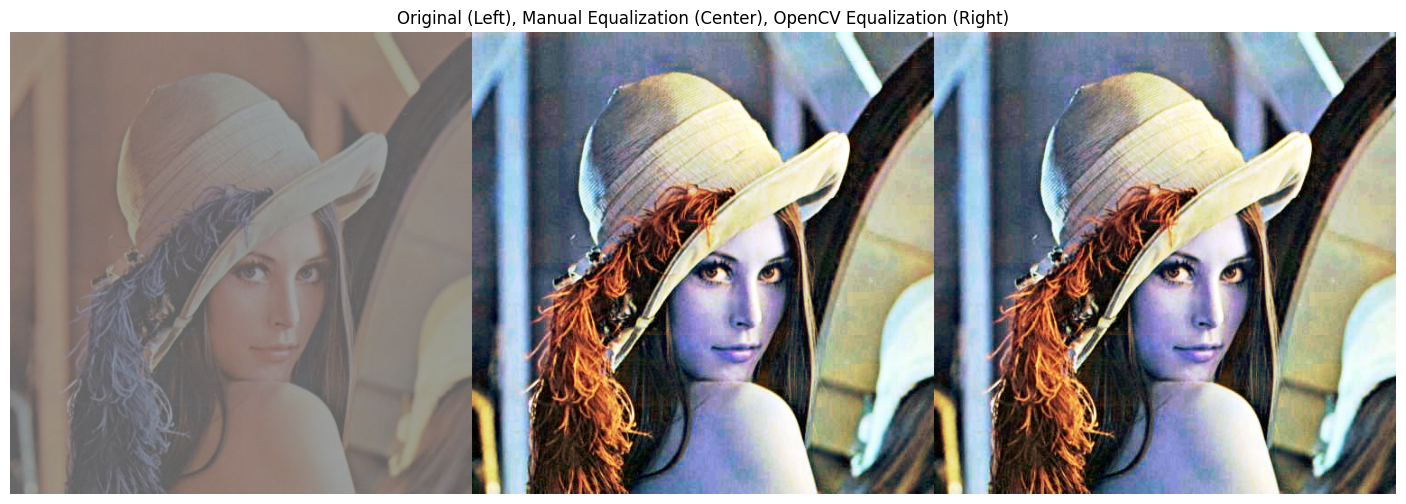

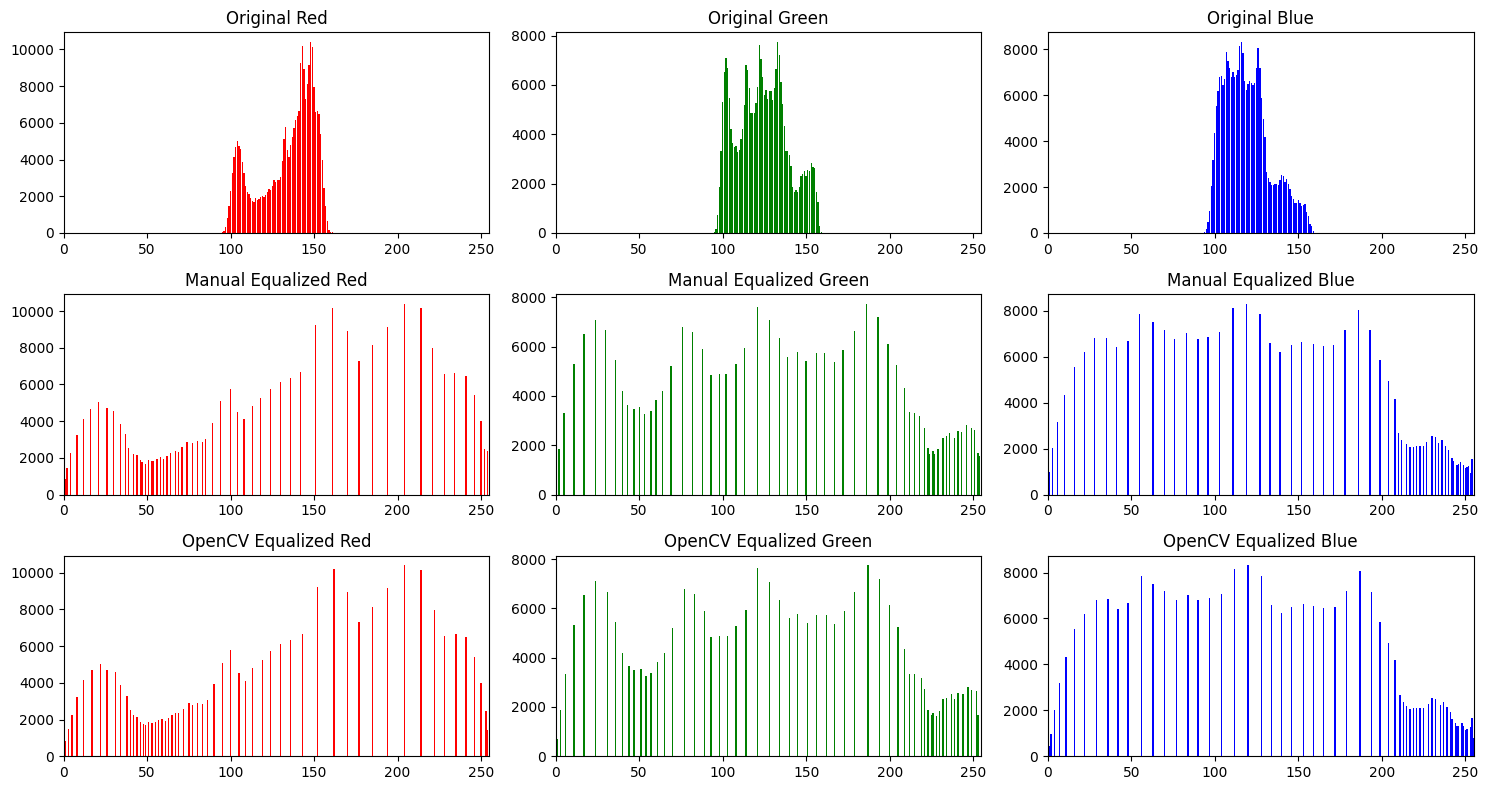

In [16]:
# Baca dan konversi gambar ke RGB
img = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Fungsi untuk manual equalization
def manual_equalization(channel):
    hist, _ = np.histogram(channel.flatten(), bins=256, range=[0,256])
    cdf = hist.cumsum()  # Cumulative Distribution Function (CDF)
    cdf_normalized = cdf / cdf[-1]  # Normalisasi CDF
    equalized_channel = np.uint8(cdf_normalized[channel] * 255)  # Buat channel yang sudah di-equalize
    return equalized_channel

# Pisahkan channel RGB dan lakukan equalization manual
R_eq_manual = manual_equalization(image_rgb[:,:,0])
G_eq_manual = manual_equalization(image_rgb[:,:,1])
B_eq_manual = manual_equalization(image_rgb[:,:,2])
manual_image = cv.merge([B_eq_manual, G_eq_manual, R_eq_manual])

# Lakukan equalization menggunakan OpenCV (cv.equalizeHist)
R_eq_cv = cv.equalizeHist(image_rgb[:,:,0])
G_eq_cv = cv.equalizeHist(image_rgb[:,:,1])
B_eq_cv = cv.equalizeHist(image_rgb[:,:,2])
opencv_image = cv.merge([B_eq_cv, G_eq_cv, R_eq_cv])

# Gabungkan gambar asli, hasil manual, dan hasil cv.equalizeHist
combined_image = cv.hconcat([image_rgb, manual_image, opencv_image])
plt.figure(figsize=(18, 6))
plt.imshow(combined_image)
plt.title("Original (Left), Manual Equalization (Center), OpenCV Equalization (Right)")
plt.axis('off')
plt.show()

# Fungsi untuk menampilkan histogram
def plot_histogram(channel, title, color, ax):
    hist, _ = np.histogram(channel.flatten(), bins=256, range=[0,256])
    ax.bar(np.arange(256), hist, color=color)
    ax.set_title(title)
    ax.set_xlim([0, 255])

# Tampilkan histogram sebelum dan sesudah equalization
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Histogram gambar asli
plot_histogram(image_rgb[:,:,0], 'Original Red', 'red', axes[0,0])
plot_histogram(image_rgb[:,:,1], 'Original Green', 'green', axes[0,1])
plot_histogram(image_rgb[:,:,2], 'Original Blue', 'blue', axes[0,2])

# Histogram hasil equalization manual
plot_histogram(R_eq_manual, 'Manual Equalized Red', 'red', axes[1,0])
plot_histogram(G_eq_manual, 'Manual Equalized Green', 'green', axes[1,1])
plot_histogram(B_eq_manual, 'Manual Equalized Blue', 'blue', axes[1,2])

# Histogram hasil equalization OpenCV
plot_histogram(R_eq_cv, 'OpenCV Equalized Red', 'red', axes[2,0])
plot_histogram(G_eq_cv, 'OpenCV Equalized Green', 'green', axes[2,1])
plot_histogram(B_eq_cv, 'OpenCV Equalized Blue', 'blue', axes[2,2])

plt.tight_layout()
plt.show()

Sekilas jika diliat dari image yang telah di equalized tidak ada perbedaan, akan tetapi jika dibaca melalui histogram yang telah dibuat tentu akan terlihat perbedaannya.

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)


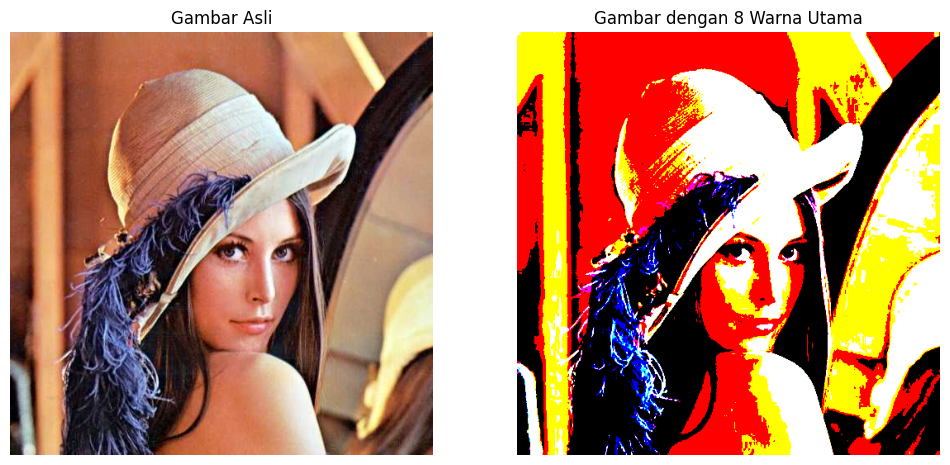

In [18]:
# Fungsi untuk memetakan warna RGB ke dalam 8 warna utama
def map_color(pixel):
    R, G, B = pixel[2], pixel[1], pixel[0]  # Urutan channel OpenCV: BGR
    # Menerapkan thresholding untuk memetakan ke dalam 8 warna utama
    R = 255 if R > 127 else 0
    G = 255 if G > 127 else 0
    B = 255 if B > 127 else 0

    # Memetakan warna RGB ke 8 warna utama
    if R == 0 and G == 0 and B == 0:
        return [0, 0, 0]  # Black
    elif R == 255 and G == 0 and B == 0:
        return [0, 0, 255]  # Red
    elif R == 0 and G == 255 and B == 0:
        return [0, 255, 0]  # Green
    elif R == 0 and G == 0 and B == 255:
        return [255, 0, 0]  # Blue
    elif R == 255 and G == 255 and B == 0:
        return [0, 255, 255]  # Yellow
    elif R == 0 and G == 255 and B == 255:
        return [255, 255, 0]  # Cyan
    elif R == 255 and G == 0 and B == 255:
        return [255, 0, 255]  # Magenta
    elif R == 255 and G == 255 and B == 255:
        return [255, 255, 255]  # White
    else:
        return [0, 0, 0]  # Default ke hitam jika tidak sesuai

# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')

# Membuat gambar hasil dengan ukuran yang sama dengan gambar asli
mapped_image = np.zeros_like(original_image)

# Memetakan setiap pixel pada gambar asli ke dalam 8 warna utama
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        mapped_image[y, x] = map_color(original_image[y, x])

# Menampilkan gambar asli dan gambar hasil pemetaan
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax[0].set_title('Gambar Asli')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(mapped_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Gambar dengan 8 Warna Utama')
ax[1].axis('off')

plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)


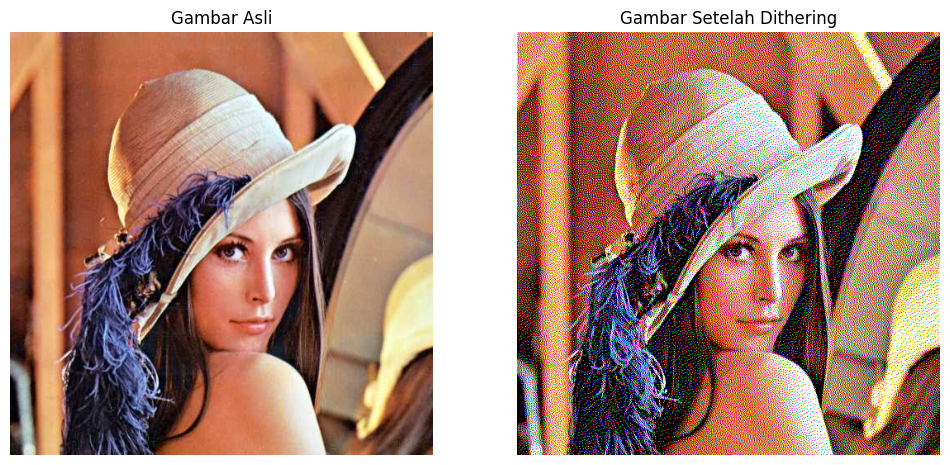

In [20]:
# Membaca gambar asli
image = cv.imread('/content/drive/MyDrive/PCVK/img/lena.jpg')
b, g, r = cv.split(image)  # Memisahkan channel B, G, R

# Menerapkan dithering Floyd-Steinberg pada setiap channel
for channel in [b, g, r]:
    for y in range(channel.shape[0]):
        for x in range(channel.shape[1]):
            old_value = channel[y, x]
            new_value = 255 if old_value > 128 else 0
            error = old_value - new_value
            channel[y, x] = new_value

            # Distribusi error ke tetangga
            if x < channel.shape[1] - 1:
                channel[y, x + 1] = np.clip(channel[y, x + 1] + error * 7 / 16, 0, 255)
            if x > 0 and y < channel.shape[0] - 1:
                channel[y + 1, x - 1] = np.clip(channel[y + 1, x - 1] + error * 3 / 16, 0, 255)
            if y < channel.shape[0] - 1:
                channel[y + 1, x] = np.clip(channel[y + 1, x] + error * 5 / 16, 0, 255)
            if y < channel.shape[0] - 1 and x < channel.shape[1] - 1:
                channel[y + 1, x + 1] = np.clip(channel[y + 1, x + 1] + error * 1 / 16, 0, 255)

# Gabungkan channel yang telah dithered
dithered_image = cv.merge([b, g, r])

# Menampilkan gambar asli dan hasil dithering
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Gambar Asli')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(dithered_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Gambar Setelah Dithering')
ax[1].axis('off')

plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

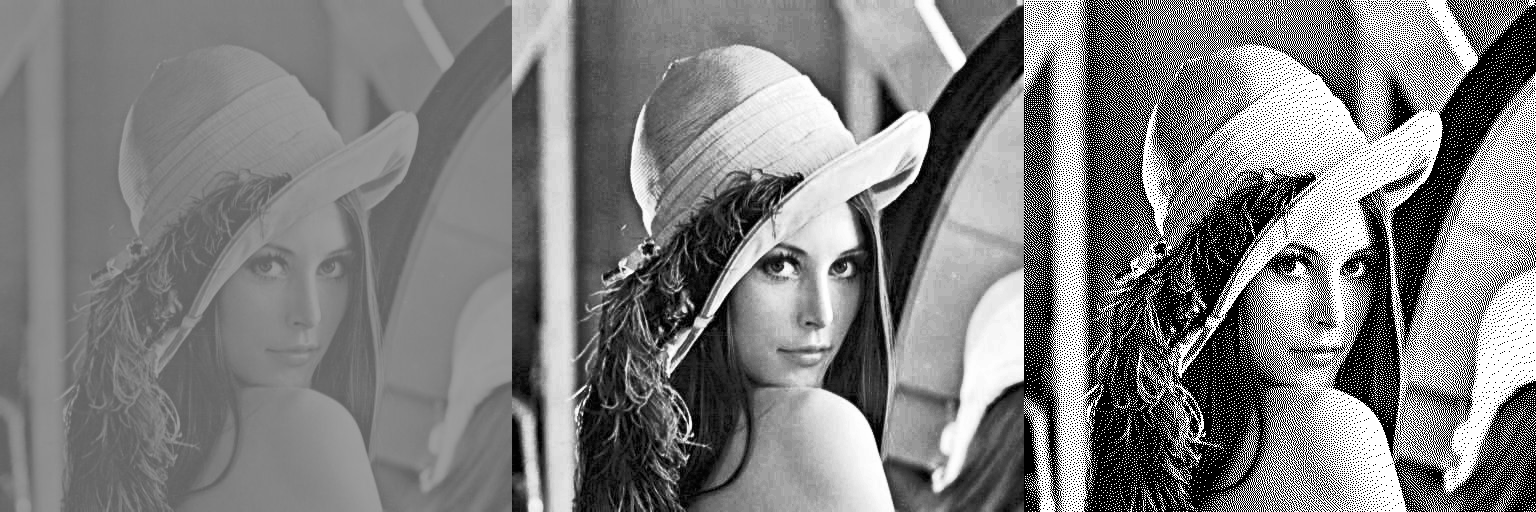

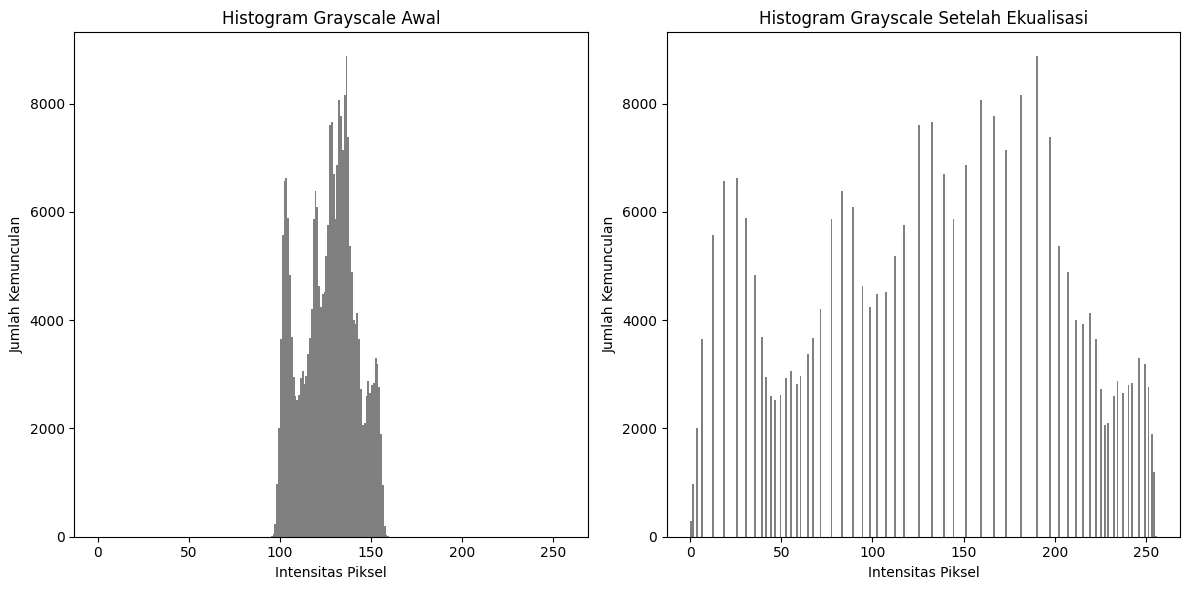

In [21]:
from google.colab.patches import cv2_imshow

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/img/lena_lc.jpg')

# Mengubah gambar menjadi grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Fungsi untuk menghitung histogram dan melakukan ekualisasi
def equalize_histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            hist[pixel] += 1
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / (height * width)
    transform_map = np.floor(255 * cdf_normalized).astype(np.uint8)
    img_eq = np.zeros((height, width), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            img_eq[y, x] = transform_map[img[y, x]]
    return img_eq

# Ekualisasi histogram
equalized_image = equalize_histogram(gray_image)

# Fungsi untuk menerapkan dithering Floyd-Steinberg dengan maksimal
def floyd_steinberg_dithering(img):
    height, width = img.shape
    dithered_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_value = img[y, x]
            # Ubah threshold agar lebih banyak tingkat warna
            if old_value >= 128:
                new_value = 255
            else:
                new_value = 0

            dithered_image[y, x] = new_value
            error = old_value - new_value

            # Sebarkan error ke piksel tetangga
            if x < width - 1:
                img[y, x + 1] = np.clip(img[y, x + 1] + error * 7 / 16, 0, 255)
            if x > 0 and y < height - 1:
                img[y + 1, x - 1] = np.clip(img[y + 1, x - 1] + error * 3 / 16, 0, 255)
            if y < height - 1:
                img[y + 1, x] = np.clip(img[y + 1, x] + error * 5 / 16, 0, 255)
            if y < height - 1 and x < width - 1:
                img[y + 1, x + 1] = np.clip(img[y + 1, x + 1] + error * 1 / 16, 0, 255)

    return dithered_image

# Menerapkan dithering
dithered_image = floyd_steinberg_dithering(equalized_image.copy())

# Menampilkan hasil
final_frame = cv.hconcat([gray_image, equalized_image, dithered_image])
cv2_imshow(final_frame)

# Plot histogram grayscale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Histogram Grayscale Awal')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='gray')

plt.subplot(1, 2, 2)
plt.title('Histogram Grayscale Setelah Ekualisasi')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Kemunculan')
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='gray')

plt.tight_layout()
plt.show()